## Write Your name: 

Backends
---------------

First, we will set the backend for the plotting to be inline. This means that the plots will be interleaved with the text. This is very convenient for the tutorial. However, it lacks interactivity. If you would like to have interactivity, use one of the other options commented below. Note that, once you set the backend, you cannot change it unless you restart the kernel.

In [1]:
%matplotlib inline
# %matplotlib qt
# %matplotlib notebook



The [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) data structure: continuous data
=============================================================

Continuous data is stored in objects of type [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html).
The core data structure is simply a 2D numpy array (channels × samples)
(in memory or loaded on demand) combined with an
[Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object (`.info` attribute)
(see [The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Loading continuous data
-----------------------

The most common way to load continuous data is from a .fif file. For more
information on [loading data from other formats](https://martinos.org/mne/stable/manual/io.html#ch-convert), or
creating it [from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

Load an example dataset, the preload flag loads the data into memory now:



In [2]:
import mne
import os.path as op
from matplotlib import pyplot as plt

In [3]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
                    
raw = mne.io.read_raw_fif(data_path, preload=True)
raw.set_eeg_reference('average', projection=True)  # set EEG average reference

Opening raw data file /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.1 MB, data loaded>

In [4]:
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

sample rate: 600.614990234375 Hz
166800 channels x 166800 samples


**Note:**
This size can also be obtained by examining `raw._data.shape`.
However this is a private attribute as its name starts
with an `_`. This suggests that you should **not** access this
variable directly but rely on indexing syntax detailed just below.

Information about the channels contained in the [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html)
object is contained in the [Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) attribute.
This is essentially a dictionary with a number of relevant fields (see
[The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Indexing data
-------------

To access the data stored within [Raw]((https://martinos.org/mne/stable/generated/mne.io.Raw.html)) objects,
it is possible to index the [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object.

Indexing a [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object will 
return two arrays: 
* an array of times, 
* the data representing those timepoints. 
    
This works even if the data is _not preloaded_, in which case the data will be
read from disk when indexing.


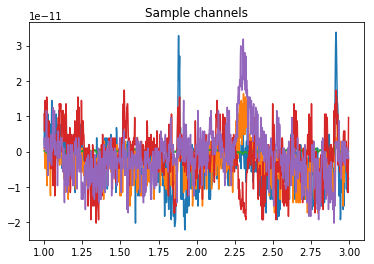

In [5]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

Selecting subsets of channels and samples
-----------------------------------------

It is possible to use more intelligent indexing to extract data, using
channel names, types or time ranges.

Pull all MEG gradiometer channels:
Make sure to use .copy() or it will overwrite the data

In [6]:
meg_only = raw.copy().pick_types(meg=True)
eeg_only = raw.copy().pick_types(meg=False, eeg=True)

The MEG flag in particular lets you specify a string for more specificity

In [7]:
grad_only = raw.copy().pick_types(meg='grad')

Or you can use custom channel names

In [8]:
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
specific_chans = raw.copy().pick_channels(pick_chans)
print(meg_only)
print(eeg_only)
print(grad_only)
print(specific_chans)

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 305 x 166800 (277.7 sec), ~391.7 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 59 x 166800 (277.7 sec), ~78.2 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 203 x 166800 (277.7 sec), ~261.7 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 4 x 166800 (277.7 sec), ~8.1 MB, data loaded>


Notice the different scalings of these types



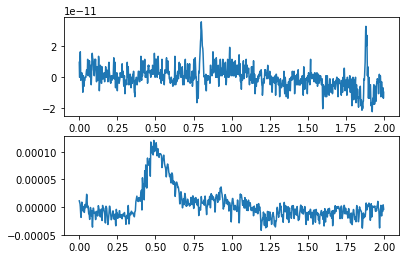

In [9]:
f, (a1, a2) = plt.subplots(2, 1)
eeg, times = eeg_only[0, :int(sfreq * 2)]
meg, times = meg_only[0, :int(sfreq * 2)]
a1.plot(times, meg[0])
a2.plot(times, eeg[0])
del eeg, meg, meg_only, grad_only, eeg_only, data, specific_chans

You can restrict the data to a specific time range



In [10]:
raw = raw.crop(0, 50)  # in seconds
print('New time range from', raw.times.min(), 's to', raw.times.max(), 's')

New time range from 0.0 s to 50.00041705299622 s


And drop channels by name



In [11]:
nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', nchan, 'to', raw.info['nchan'])

Number of channels reduced from 376 to 374


Concatenating  [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) objects
--------------------------------------------------

[Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) objects can be concatenated in time by using the
[raw.append](https://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw.append) function. For this to work, they must have the same number of channels and their [Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) structures should be compatible.



In [12]:
# Create multiple Raw objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Time extends from 0.0 s to 40.00399655463821 s


Visualizing Raw data
--------------------
All of the plotting method names start with `plot`. If you’re using IPython console, you can just
write `raw.plot` and ask the interpreter for suggestions with a tab key.

To visually inspect your raw data, you can use:

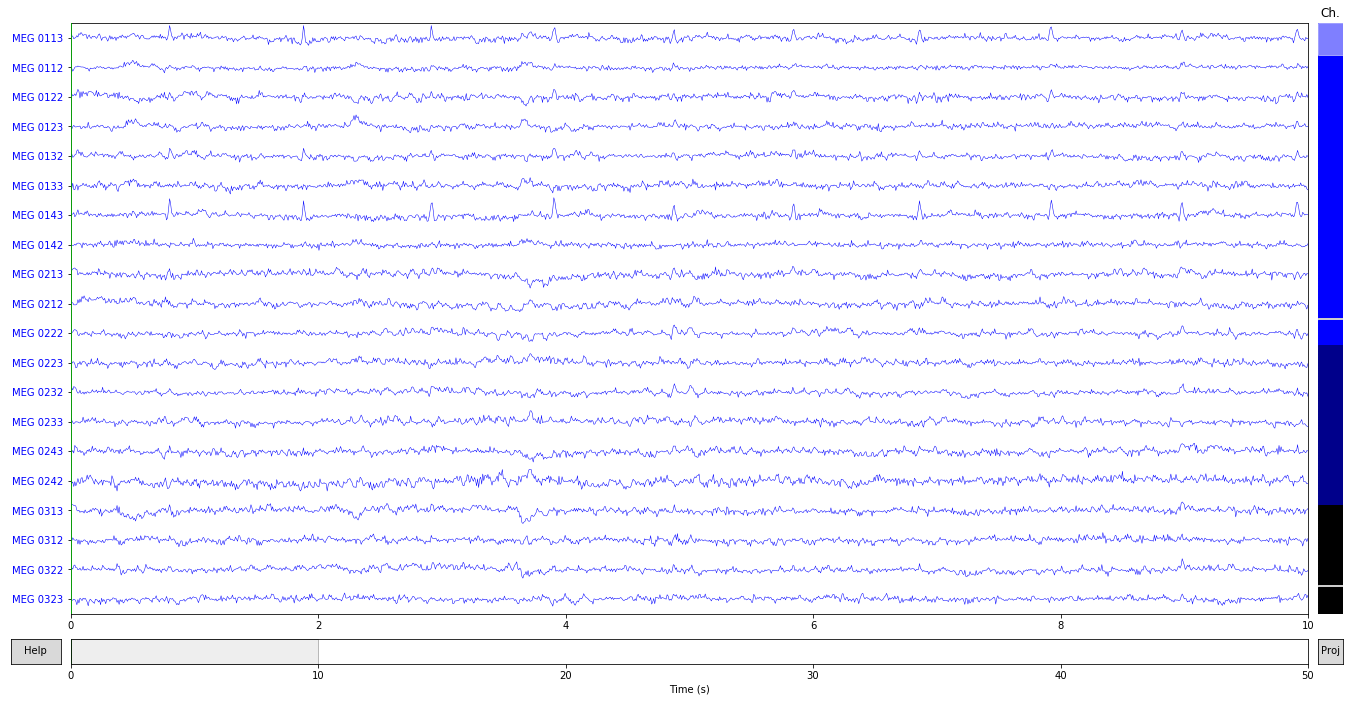

In [13]:
raw.plot(block=True, lowpass=40);

The channels are color coded by channel type. 
* MEG = blue, EEG = black
* Bad channels on scrollbar color coded gray. 
* Clicking the lines or channel names on the left, to mark or unmark a bad channel interactively. 
* +/- keys to adjust the scale (also = works for magnifying the data).
* Initial scaling factors can be set with parameter `scalings`. 
* If you don’t know the scaling factor for channels, you can automatically set them by passing scalings=’auto’. 
* With `pageup/pagedown` and `home/end` keys you can adjust the amount of data viewed at once.

We can also plot the PSD to inspect:
* Power line
* Bad channels
* Head position indicator coils
* Whether data is filtered or not

Effective window size : 3.410 (s)


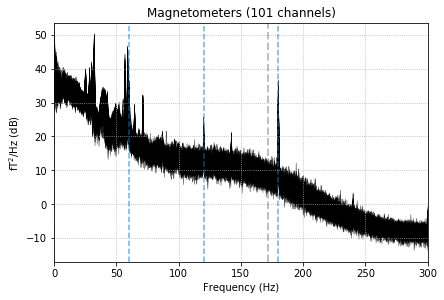

In [14]:
fig, ax = plt.subplots(1, 1)
raw.copy().pick_types(meg='mag').plot_psd(spatial_colors=False, show=False,
                                          ax=ax);
for freq in [60., 120., 180.]:
    ax.axvline(freq, linestyle='--', alpha=0.6)

Exercises
--------------

1) Quite often the EOG channel is not marked correctly in the raw data. You may need to rename it. Can you figure out how to do this?

In [15]:
# your code here

2) How will you check that at least one EEG channel exists in the data?

In [16]:
# your code here

3) Can you plot the data in the trigger channel?

*HINT*: The channel type is called 'stim'

In [17]:
from mne import pick_types
import matplotlib.pyplot as plt

# your code here

In [1]:
%matplotlib inline



The [mne.Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) data structure: epoched data
=============================================================

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects are a way of representing continuous
data as a collection of time-locked trials, stored in an array of shape
``(n_events, n_channels, n_times)``. They are useful for many statistical
methods in neuroscience, and make it easy to quickly overview what occurs
during a trial.



Creating epochs
=============

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects can be created in three ways:
 1. From a [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object, along with event times
 2. From an [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) object that has been saved as a
    `.fif` file
 3. From scratch using [EpochsArray](https://martinos.org/mne/dev/generated/mne.EpochsArray.html#mne.EpochsArray). See
    [Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures)



Import packages

In [2]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

Then, we will load the data

In [3]:
data_path = mne.datasets.sample.data_path()
# Load a dataset that contains events
raw = mne.io.read_raw_fif(
    op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

Opening raw data file /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


Extract events
--------------

In [4]:
# If your raw object has a stim channel, you can construct an event array
# easily
events = mne.find_events(raw, stim_channel='STI 014')

320 events found
Event IDs: [ 1  2  3  4  5 32]


Look at the first 5 events (onset, value before event, event id):

In [5]:
print(events[:5])

[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


We can plot the events

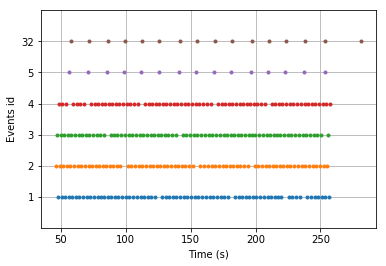

In [6]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq']);

Specify event codes of interest with descriptive labels.

In [7]:
# This dataset also has visual left (3) and right (4) events, but
# to save time and memory we'll just look at the auditory conditions
# for now.
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

Expose the raw data as epochs, cut from -0.1 s to 1.0 s relative to the event
onsets



In [8]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped
<Epochs  |   145 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~279.0 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


Note that epochs constructed in this manner will not have their
data available until explicitly read into memory, which you can do with
[get_data](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.get_data). Alternatively, you can use
`preload=True`.

Epochs behave similarly to [`mne.io.Raw`](https://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw) objects. They have an
[`info`](https://martinos.org/mne/dev/generated/mne.Info.html#mne.Info) attribute that has all of the same
information, as well as a number of attributes unique to the events contained
within the object.



In [9]:
print(epochs.events[:3])
print(epochs.event_id)

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]]
{'Auditory/Left': 1, 'Auditory/Right': 2}


Indexing epochs
=============

You can select subsets of epochs by indexing the [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) 
object directly. Alternatively, if you have epoch names specified in
`event_id` then you may index with strings instead.


In [10]:
print(epochs[1:5])
print(epochs['Auditory/Right'])

<Epochs  |   4 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~11.2 MB, data loaded,
 'Auditory/Left': 2
 'Auditory/Right': 2>
<Epochs  |   73 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~142.3 MB, data loaded,
 'Auditory/Right': 73>


Note the '/'s in the event code labels. These separators allow tag-based
selection of epoch sets; 

Every string separated by '/' can be entered, and
returns the subset of epochs matching any of the strings. E.g.,



In [11]:
print(epochs['Right'])
print(epochs['Right', 'Left'])

<Epochs  |   73 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~142.3 MB, data loaded,
 'Auditory/Right': 73>
<Epochs  |   145 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~279.0 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


In [12]:
print(epochs['Auditory'])

<Epochs  |   145 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~279.0 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


Note that MNE will not complain if you ask for tags not present in the
object, as long as it can find some match: the below example is parsed as
(inclusive) 'Right' OR 'Left'. However, if no match is found, an error is
returned.



In [13]:
epochs_r = epochs['Right']
epochs_still_only_r = epochs_r[['Right', 'Left']]
print(epochs_still_only_r)

try:
    epochs_still_only_r["Left"]
except KeyError: 
    print("Tag-based selection without any matches raises a KeyError!")

<Epochs  |   73 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~142.3 MB, data loaded,
 'Auditory/Right': 73>
Tag-based selection without any matches raises a KeyError!


It is also possible to iterate through [`Epochs`](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs) objects
in this way. Note that behavior is different if you iterate on `Epochs`
directly rather than indexing:



In [14]:
# These will be epochs objects
for i in range(3):
    print(epochs[i])

# These will be arrays
for ep in epochs[:2]:
    print(ep)

<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.5 MB, data loaded,
 'Auditory/Right': 1>
<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.5 MB, data loaded,
 'Auditory/Left': 1>
<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.5 MB, data loaded,
 'Auditory/Right': 1>
[[-1.56510152e-12 -6.00746037e-13  3.63609444e-13 ... -5.42252344e-12
  -3.49381248e-12  8.07845329e-12]
 [ 4.71111366e-12  2.78240270e-12 -1.10663744e-13 ... -2.03937471e-12
  -1.07501922e-12  1.81804722e-12]
 [ 1.27694161e-13  1.26810933e-13  8.74659808e-14 ...  3.27176412e-14
   5.59107736e-14  6.80975243e-14]
 ...
 [-7.88218509e-06 -9.77900515e-06 -9.28950320e-06 ... -6.53605473e-06
  -7.14793216e-06 -8.80000125e-06]
 [-6.95813002e-06 -8.06909195e-06 -7.19201674e-06 ... -6.25646985e-06
  -6.60729993e-06 -8.36145036e-06]
 [ 1.26772322e-05  1.26772322e-05  1.33309187e-05 ... -1.41239155e-05
  -1.41239155e-05 -1.15091693

Dropping epochs
-------------------------

* Manually by using [epochs.drop(idx)](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.drop), 
* Using rejection or flat thresholds with [epochs.drop_bad(reject, flat)](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.drop_bad).

In [15]:
epochs.drop([0], reason='User reason')
epochs.drop_bad(reject=dict(grad=2500e-13, mag=4e-12, eog=200e-6), flat=None)

Dropped 1 epoch
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1421']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1421']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch

<Epochs  |   121 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~233.4 MB, data loaded,
 'Auditory/Left': 57
 'Auditory/Right': 64>

You can also inspect the reason why epochs were dropped.

In [16]:
print(epochs.drop_log);

[['User reason'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], ['EOG 061'], ['IGNORED'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], ['IGNORED'], [], ['IGNORED'], ['EOG 061'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], ['IGNORED'], ['EOG 061'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], ['IGNORED'], ['IGNORED'], ['IGNORED'], ['EOG 061'], ['IGNORED'], ['EOG 061'], ['IGNORED'], ['EOG 061'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], ['IGNORED'], [], ['IGNORED'], [], ['IGNORED'], [], ['IG

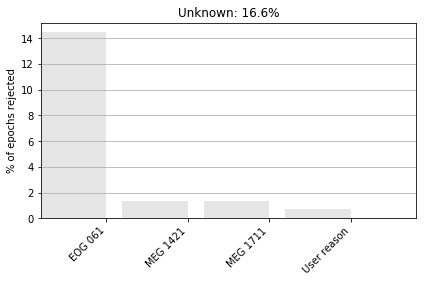

In [17]:
epochs.plot_drop_log();

The indices from the original set of events are stored in ``epochs.selection``.

In [18]:
print(epochs.selection)

[  2   4   6   8  10  12  14  19  21  23  25  27  29  31  33  35  38  42
  44  46  48  50  52  54  56  58  63  65  67  69  71  73  75  77  88  90
  92  94  96  98 101 103 105 107 109 111 113 115 117 122 126 128 130 132
 134 136 138 140 142 145 151 153 155 157 159 161 168 170 174 176 178 182
 184 189 191 193 197 199 201 206 214 218 220 222 224 229 231 233 235 237
 239 241 243 245 248 250 252 254 256 258 262 264 269 271 273 281 285 290
 292 294 296 298 300 302 304 306 308 310 313 315 317]


Input/Output
------------------

If you wish to save the epochs as a file, you can do it with
[mne.Epochs.save](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.save). To conform to MNE naming conventions, the
epochs file names should end with '-epo.fif'.



In [19]:
epochs_fname = op.join(data_path, 'MEG', 'sample', 'sample-epo.fif')
epochs.save(epochs_fname)

Later on you can read the epochs with [`mne.read_epochs`](https://martinos.org/mne/dev/generated/mne.read_epochs.html#mne.read_epochs). For reading
EEGLAB epochs files see [`mne.read_epochs_eeglab`](https://martinos.org/mne/dev/generated/mne.read_epochs_eeglab.html#mne.read_epochs_eeglab). We can also use
``preload=False`` to save memory, loading the epochs from disk on demand.



In [20]:
epochs = mne.read_epochs(epochs_fname, preload=False)

Reading /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
121 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
121 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated


If you wish to look at the average across trial types, then you may do so,
creating an [`Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) object in the process. Instances
of `Evoked` are usually created by calling [`mne.Epochs.average`](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average).



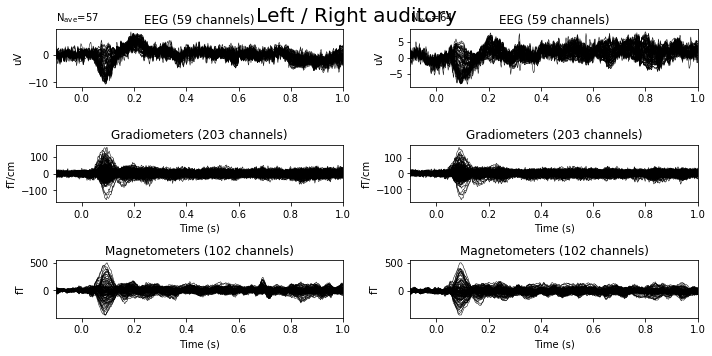

In [21]:
ev_left = epochs['Auditory/Left'].average()
ev_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('Left / Right auditory', fontsize=20)
_ = ev_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_right.plot(axes=axs[:, 1], show=False, time_unit='s')
plt.tight_layout()

For creating `Evoked` from other data structures see [mne.EvokedArray](https://martinos.org/mne/stable/generated/mne.EvokedArray.html#mne.EvokedArray) and [Creating MNE's data structures from scratch](https://martinos.org/mne/dev/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

To export and manipulate Epochs using Pandas see
[Export epochs to pandas dataframe](https://martinos.org/mne/stable/auto_tutorials/plot_epochs_to_data_frame.html#sphx-glr-auto-tutorials-plot-epochs-to-data-frame-py),
or to work directly with metadata in MNE-Python see [Pandas querying and metadata with Epochs objects](https://martinos.org/mne/stable/auto_tutorials/plot_metadata_epochs.html#sphx-glr-auto-tutorials-plot-metadata-epochs-py).

# Visualizing epochs data

We can visualize epochs the same way as raw data

Loading data for 20 events and 662 original time points ...


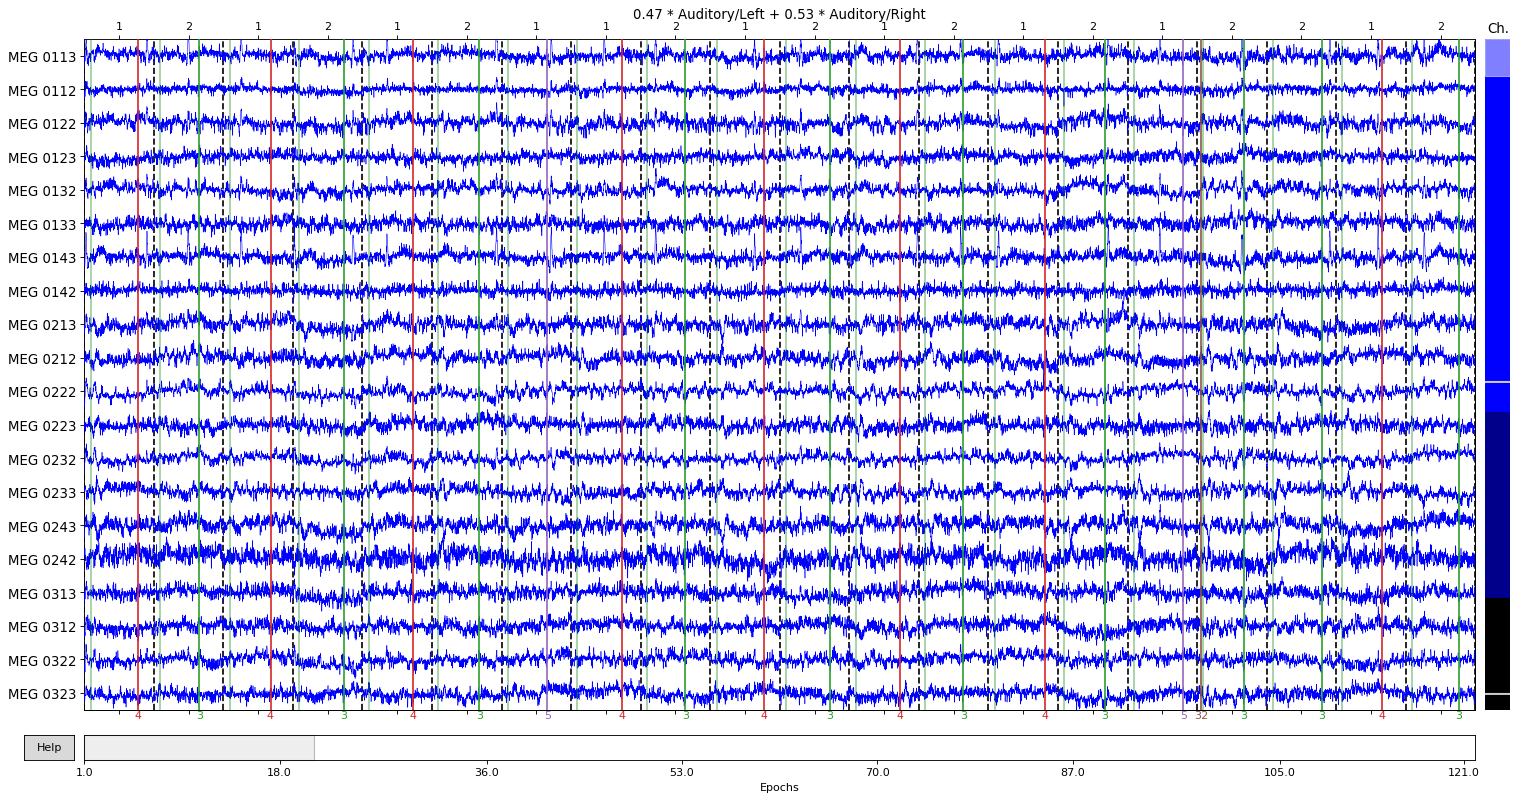

In [22]:
epochs.plot(block=True, events=events);

We can mark bad epochs interactively and scroll through the data

It's also possible to plot a single epoch as an image

Loading data for 121 events and 662 original time points ...


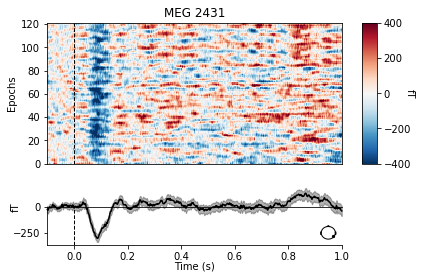

In [23]:
epochs.plot_image(278, cmap='interactive', sigma=1., vmin=-400, vmax=400);

Exercises
--------------
1) Can you find out the indices of the epochs that have been removed due to eyeblinks?

In [24]:
epochs = mne.read_epochs(epochs_fname, preload=False)
# your code here
# print(idxs)

Reading /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
121 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
121 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated


2) Can you find the indices of channels corresponding to `EOG 061`?

In [25]:
# your code here
# print(epochs.info['ch_names'][picks])

3) Can you plot the EOG channel for these epochs and verify that these do indeed contain eyeblinks?

In [26]:
# your code here

In [1]:
%matplotlib inline



The [mne.Evoked](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure: evoked/averaged data
=====================================================================

The [`mne.Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure is mainly used for storing
averageddata over trials. In MNE the evoked objects are usually created by
averaging epochs data with [`mne.Epochs.average`](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.average).



In [2]:
import os.path as op

import mne

Here for convenience we read the evoked dataset from a file.



In [3]:
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)

Reading /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj 

Notice that the reader function returned a list of evoked instances. This is
because you can store multiple categories into a single file. Here we have
categories of
``['Left Auditory', 'Right Auditory', 'Left Visual', 'Right Visual']``.
We can also use ``condition`` parameter to read in only one category.



In [4]:
evoked = mne.read_evokeds(fname, condition='Left Auditory')
evoked.apply_baseline((None, 0)).apply_proj()
print(evoked)

Reading /home/mainak/Desktop/projects/github_repos/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
<Evoked  |  'Left Auditory' (mean, N=55), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


The [Info](https://martinos.org/mne/stable/auto_tutorials/plot_info.html) attribute is also present here just as in raw and epochs.


In [5]:
print(evoked.info)
print(evoked.times)

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    maxshield : bool | False
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: on, PCA-v2: on, PCA-v3: on, ...
    sfreq : float | 600.614990234375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem

The evoked data structure also contains some new attributes easily
accessible:



In [6]:
print(evoked.nave)  # Number of averaged epochs.
print(evoked.first)  # First time sample.
print(evoked.last)  # Last time sample.
print(evoked.comment)  # Comment on dataset. Usually the condition.
print(evoked.kind)  # Type of data, either average or standard_error.

55
-120
300
Left Auditory
average


The data is also easily accessible. Since the evoked data arrays are usually
much smaller than raw or epochs datasets, they are preloaded into the memory
when the evoked object is constructed. You can access the data as a numpy
array.



In [7]:
data = evoked.data
print(data.shape)

(376, 421)


The data is arranged in an array of shape `(n_channels, n_times)`. Notice
that unlike epochs, evoked object does not support indexing. This means that
to access the data of a specific channel you must use the data array
directly.



In [8]:
print('Data from channel {0}:'.format(evoked.ch_names[10]))
print(data[10])

Data from channel MEG 0142:
[-5.23565064e-13 -4.71585139e-13 -3.86683209e-13 -2.83273649e-13
 -1.77306112e-13 -8.40611219e-14 -1.61924078e-14  1.77381210e-14
  1.40744336e-14 -2.58271015e-14 -9.61522377e-14 -1.87714557e-13
 -2.89375756e-13 -3.89584208e-13 -4.77813276e-13 -5.45725710e-13
 -5.87940404e-13 -6.02348966e-13 -5.89997316e-13 -5.54604288e-13
 -5.01825677e-13 -4.38392525e-13 -3.71250724e-13 -3.06800010e-13
 -2.50310349e-13 -2.05542229e-13 -1.74580799e-13 -1.57849570e-13
 -1.54264699e-13 -1.61491852e-13 -1.76251146e-13 -1.94655758e-13
 -2.12557648e-13 -2.25896541e-13 -2.31046307e-13 -2.25152439e-13
 -2.06448989e-13 -1.74519893e-13 -1.30478919e-13 -7.70193540e-14
 -1.83008226e-14  4.03521585e-14  9.29388774e-14  1.33429445e-13
  1.56509623e-13  1.58334178e-13  1.37187906e-13  9.39425253e-14
  3.22229137e-14 -4.17800040e-14 -1.19859868e-13 -1.92671983e-13
 -2.50842568e-13 -2.86173426e-13 -2.92783887e-13 -2.68019382e-13
 -2.12986679e-13 -1.32611683e-13 -3.51871554e-14  6.85579487e-

If you want to import evoked data from some other system and you have it in a
numpy array you can use [mne.EvokedArray](https://martinos.org/mne/stable/generated/mne.EvokedArray.html) for that. All you need is
the data and some info about the evoked data. 


In [9]:
evoked = mne.EvokedArray(data, evoked.info, tmin=evoked.times[0])


For more information, see
[Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

Visualization
-------------

We can plot the evoked response

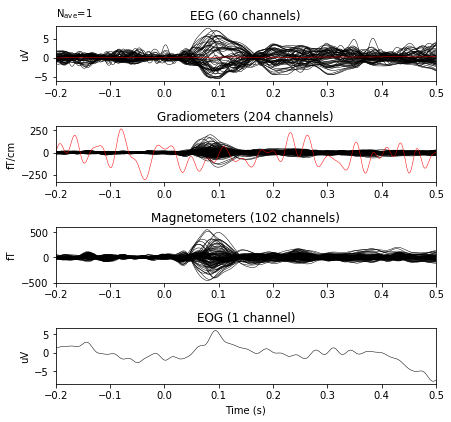

In [10]:
evoked.plot(time_unit='s', exclude=[]);

We can also plot the topographic map for some time instances

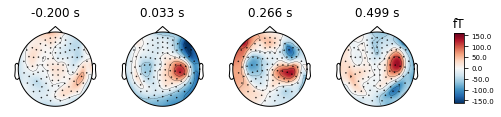

In [11]:
evoked.plot_topomap();

Or even plot them both together ...

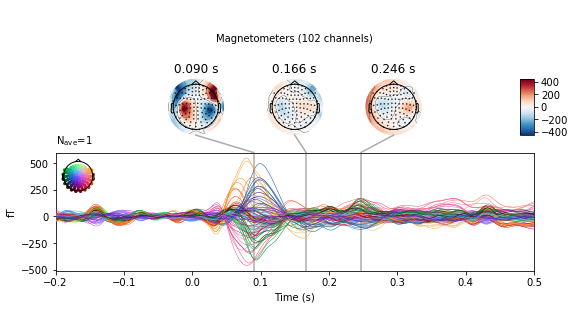

In [12]:
evoked.copy().pick_types(meg='mag').plot_joint();

To contrast evokeds, we can do

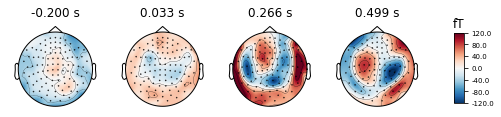

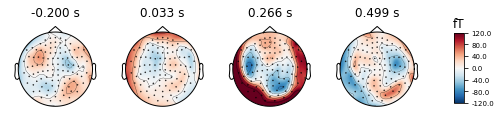

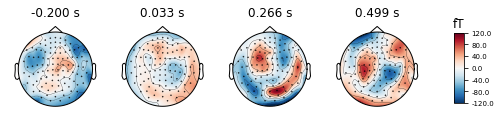

In [13]:
vmin, vmax =-120, 120
evokeds[2].plot_topomap(vmin=vmin, vmax=vmax);
evokeds[3].plot_topomap(vmin=vmin, vmax=vmax);
contrast = mne.combine_evoked(evokeds[2:], weights=[1, -1])
contrast.plot_topomap(vmin=vmin, vmax=vmax);

Exercises
--------------

1) How will you save evoked data to disk?


In [14]:
# your code here

2) Can you plot the topomap at 10 evenly spaced time instances?

HINT: Use np.linspace

In [15]:
# your code here

In [1]:
%matplotlib inline



The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data structure
===========================================

The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data object is typically created
when data is imported into MNE-Python and contains details such as:

- date, subject information, and other recording details
- the sampling rate
- information about the data channels (name, type, position, etc.)
- digitized points
- sensor–head coordinate transformation matrices

and so forth. See the [`the API reference`](https://martinos.org/mne/stable/generated/mne.Info.html)
for a complete list of all data fields. Once created, this object is passed
around throughout the data analysis pipeline.



[`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html) behaves as a nested Python dictionary:



In [2]:
import mne
import os.path as op

In [3]:
# Read the info object from an example recording
info = mne.io.read_info(
    op.join(mne.datasets.sample.data_path(), 'MEG', 'sample',
            'sample_audvis_raw.fif'), verbose=False)

List all the fields in the info object



In [4]:
print('Keys in info dictionary:\n', info.keys())

Keys in info dictionary:
 dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


List all information about the first data channel



In [5]:
print(info['chs'][0])

{'scanno': 1, 'logno': 113, 'kind': 1, 'range': 0.00030517578125, 'cal': 3.1600000394149674e-09, 'coil_type': 3012, 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
       -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
        0.18674099,  0.013541  ]), 'unit': 201, 'unit_mul': 0, 'ch_name': 'MEG 0113', 'coord_frame': 1}


Obtain the sampling rate of the data



In [6]:
print(info['sfreq'], 'Hz')

600.614990234375 Hz



Obtaining subsets of channels
-----------------------------

There are a number of convenience functions to obtain channel indices, given
an [`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object.



Get channel indices by name



In [7]:
channel_indices = mne.pick_channels(info['ch_names'], ['MEG 0312', 'EEG 005'])

Get channel indices by regular expression



In [8]:
channel_indices = mne.pick_channels_regexp(info['ch_names'], 'MEG *')

Channel types
-------------

MNE supports different channel types:

- eeg : For EEG channels with data stored in Volts (V)
- meg (mag) : For MEG magnetometers channels stored in Tesla (T)
- meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)
- ecg : For ECG channels stored in Volts (V)
- seeg : For Stereotactic EEG channels in Volts (V).
- ecog : For Electrocorticography (ECoG) channels in Volts (V).
- fnirs (HBO) : Functional near-infrared spectroscopy oxyhemoglobin data.
- fnirs (HBR) : Functional near-infrared spectroscopy deoxyhemoglobin data.
- emg : For EMG channels stored in Volts (V)
- bio : For biological channels (AU).
- stim : For the stimulus (a.k.a. trigger) channels (AU)
- resp : For the response-trigger channel (AU)
- chpi : For HPI coil channels (T).
- exci : Flux excitation channel used to be a stimulus channel.
- ias : For Internal Active Shielding data (maybe on Triux only).
- syst : System status channel information (on Triux systems only).

Get channel indices by type

In [9]:
channel_indices = mne.pick_types(info, meg=True)  # MEG only
channel_indices = mne.pick_types(info, meg=False, eeg=True)  # EEG only

MEG gradiometers and EEG channels



In [10]:
channel_indices = mne.pick_types(info, meg='grad', eeg=True)

Get a dictionary of channel indices, grouped by channel type



In [11]:
channel_indices_by_type = mne.io.pick.channel_indices_by_type(info)
print('The first three magnetometers:', channel_indices_by_type['mag'][:3])

The first three magnetometers: [2, 5, 8]


Obtaining information about channels
------------------------------------



Channel type of a specific channel

In [12]:
channel_type = mne.io.pick.channel_type(info, 75)
print('Channel #75 is of type:', channel_type)

Channel #75 is of type: grad


Channel types of a collection of channels



In [13]:
meg_channels = mne.pick_types(info, meg=True)[:10]
channel_types = [mne.io.pick.channel_type(info, ch) for ch in meg_channels]
print('First 10 MEG channels are of type:\n', channel_types)

First 10 MEG channels are of type:
 ['grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad']


Dropping channels from an info structure
----------------------------------------

It is possible to limit the info structure to only include a subset of
channels with the [`mne.pick_info`](https://martinos.org/mne/stable/generated/mne.pick_info.html#mne.pick_info) function:



In [14]:
# Only keep EEG channels
eeg_indices = mne.pick_types(info, meg=False, eeg=True)
reduced_info = mne.pick_info(info, eeg_indices)

print(reduced_info)

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | 0 items
    ch_names : list | EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, ...
    chs : list | 59 items (EEG: 59)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 59
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    gantry_angle : NoneTyp

Exercises
--------------

1) Can you plot the EEG sensors in the info?

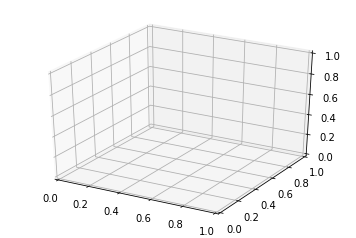

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# your code here to compute x, y, z

# ax.scatter(x, y, z)

In fact, you can use a convenient method `raw.plot_sensors` to just do this.

Opening raw data file /local_mount/space/meghnn/1/users/mjas/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


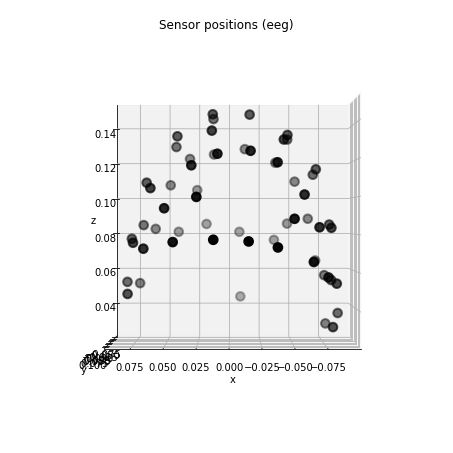

In [16]:
# % matplotlib notebook
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True).pick_types(eeg=True, meg=False)
raw.plot_sensors(kind='3d');